In [2]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Geometric Brownian Motion
# St=S0exp[(μ−σ^2/2)t+σWt], Wt is Brownian motion

mu = 0.1 #drift
n = 250 #number of time steps
T = 1   # time in years
M = 1000 # number of simulations
S0 = 100 #initial price
sigma = 0.2  #volatility, assuming constant

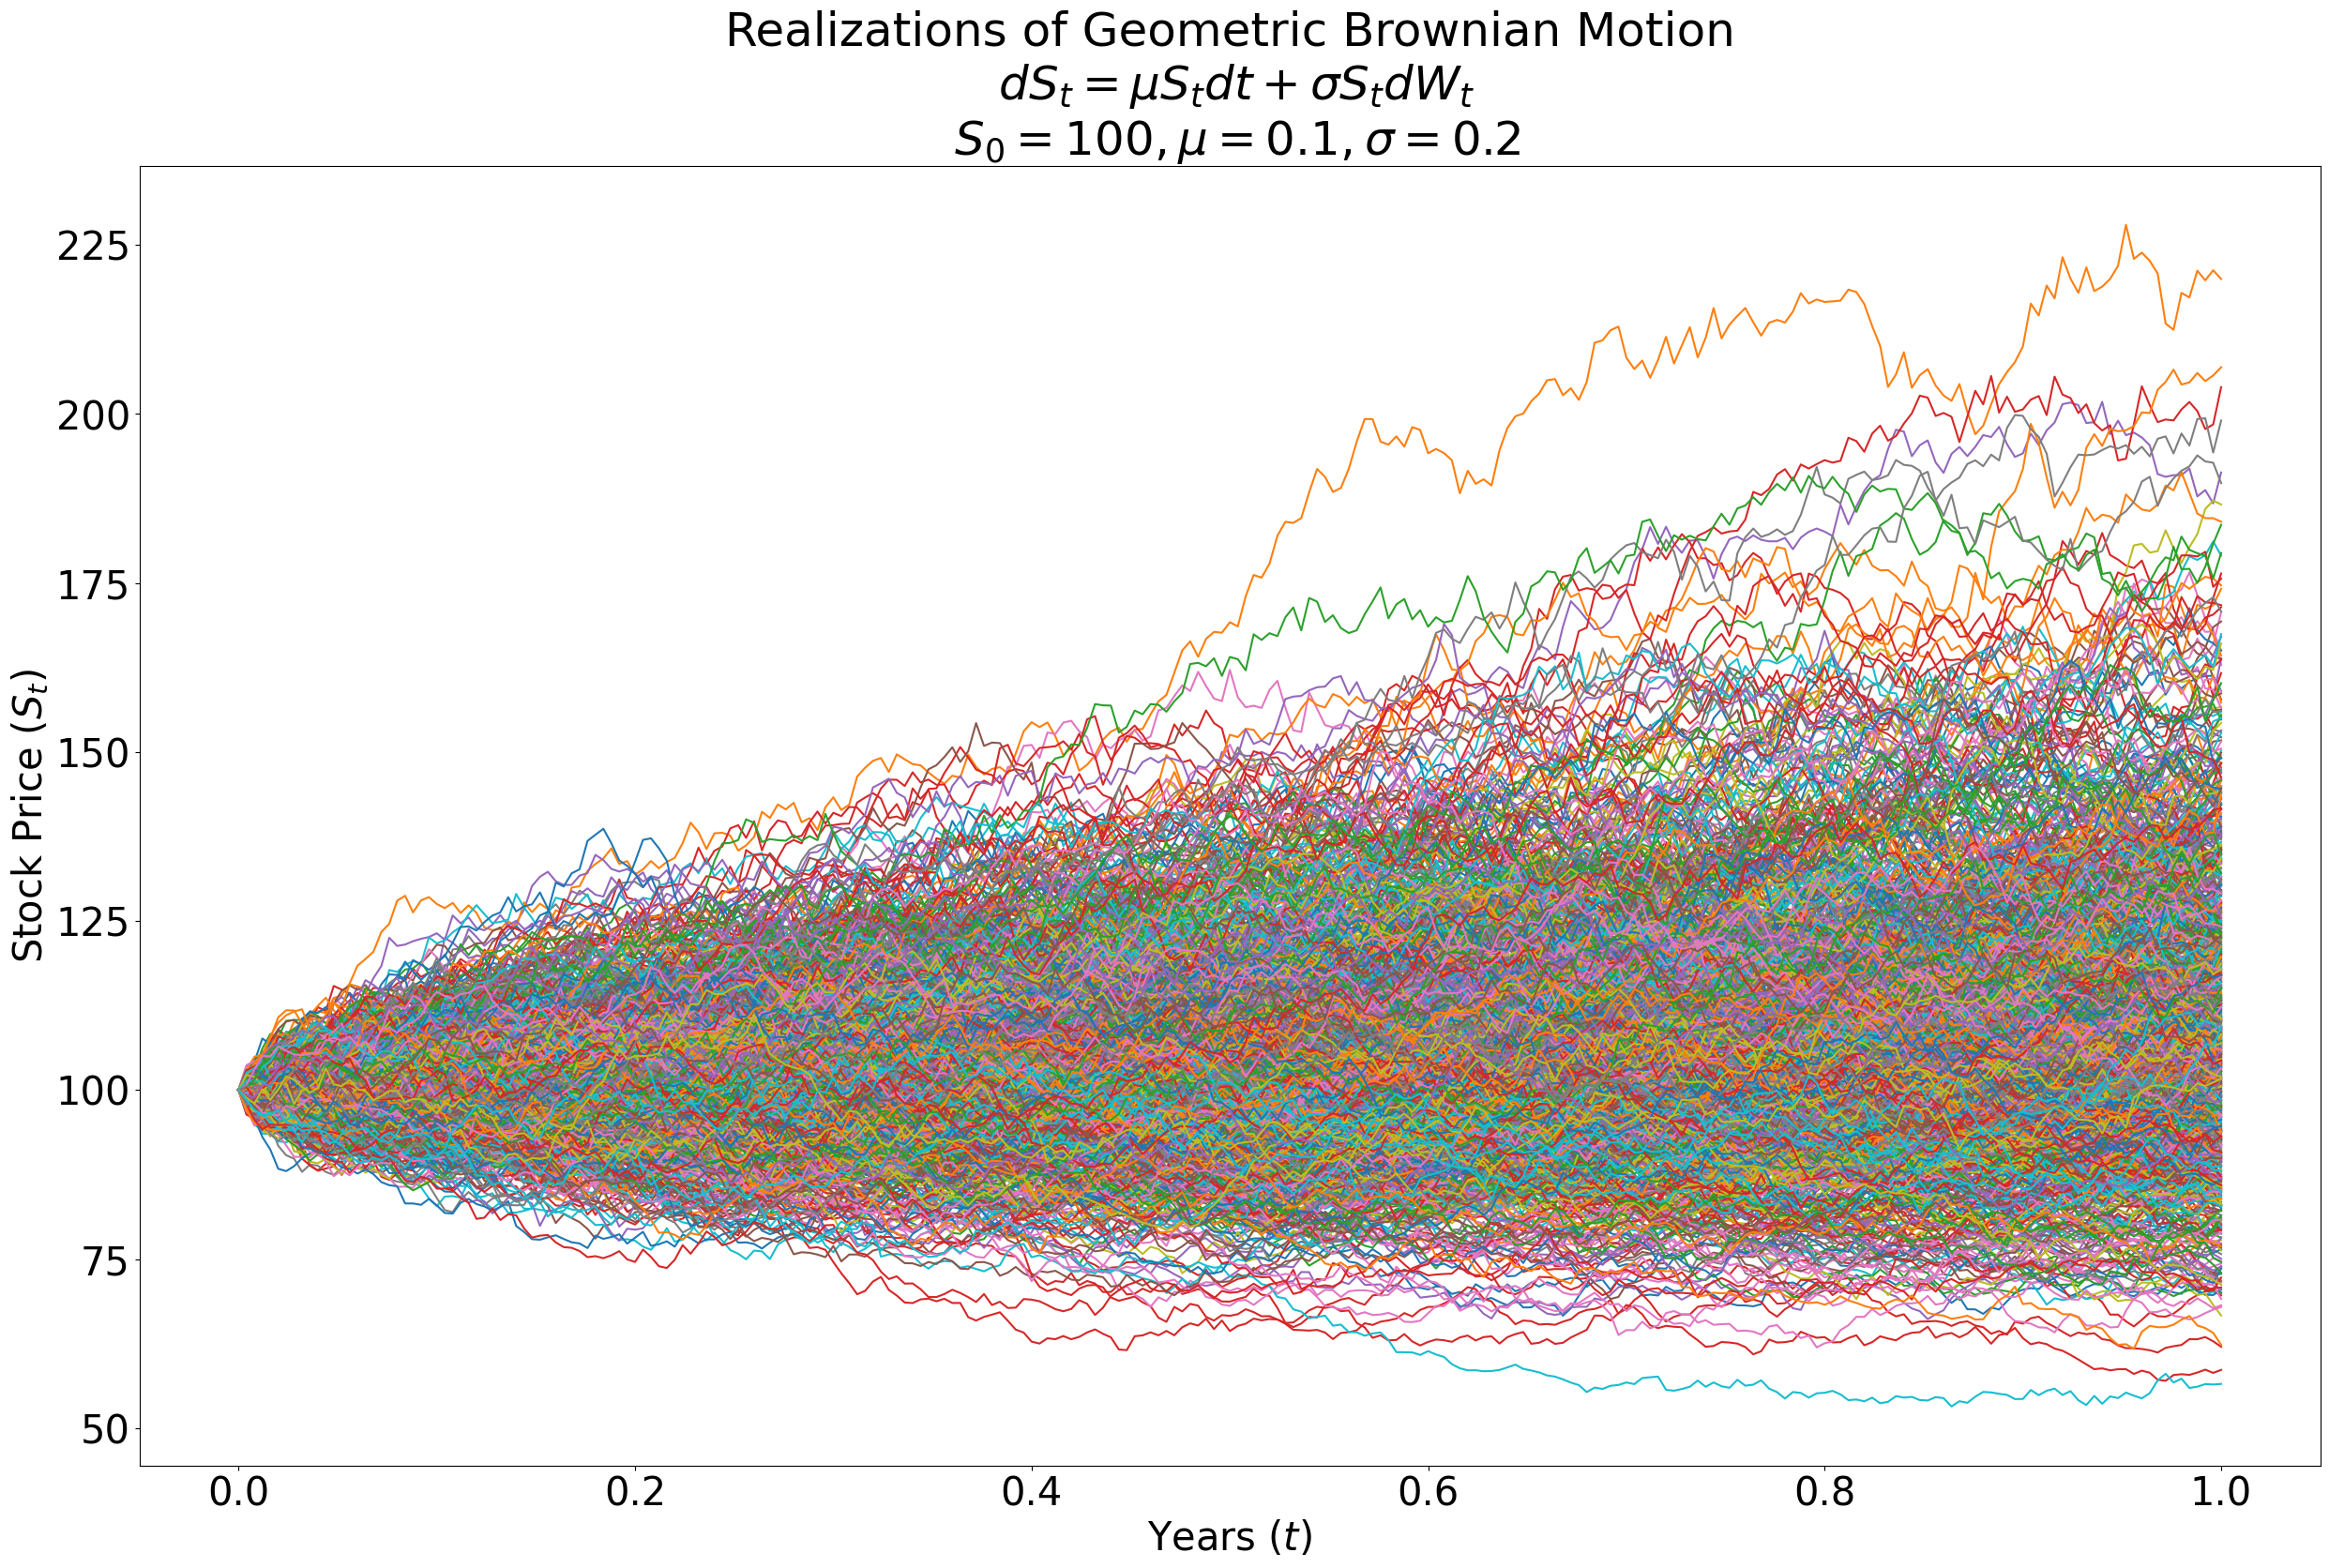

In [38]:
#calc each time step
dt = T/n

#simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2/2)*dt
    +sigma*np.random.normal(0,np.sqrt(dt),size =(M,n)).T
)

#include array of 1's
St = np.vstack([np.ones(M),St])

#multiply through by S0 and return culmulative product of elements along a given simulation path
St = S0 * St.cumprod(axis =0 ) #across each simulation path

time = np.linspace(0,T,n+1) #time interval
tt = np.full(shape=(M,n+1),fill_value =time).T

plt.rcParams['font.size'] =30
fig,ax1 = plt.subplots(figsize=(30,18))
plt.plot(tt,St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()

In [39]:
mean_end_price = round(np.mean(St[-1]),2)
print("Expected price: ", str(mean_end_price))

Expected price:  111.13


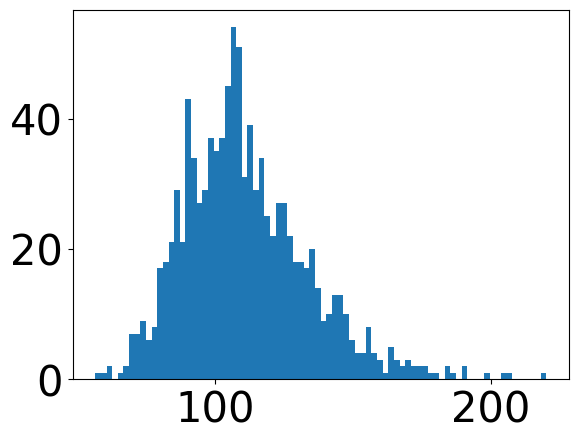

In [46]:
plt.hist(St[-1],bins=80)
plt.show()